#### Imports

In [1]:
import dask.dataframe as dd

#### Dask Distributed

In [5]:
from dask.distributed import Client, LocalCluster

In [6]:
client = Client()

#### Read CSV

In [111]:
# df = dd.read_csv('/Users/admin/Projects/data/ny-taxi/yellow_tripdata_2015-01.csv')
df = dd.read_csv('/Users/admin/Projects/data/ny-taxi/yellow_tripdata_2016-06.csv'
                 ,dtype={
                         'payment_type': 'float64'
                         ,'pickup_latitude': 'object'
                         ,'VendorID': 'object'
                         ,'trip_distance': 'object'
                        }
                  )

In [104]:
df.head()
# df.info().compute()

<class 'dask.dataframe.core.DataFrame'>
Columns: 19 entries, VendorID to total_amount
dtypes: object(4), float64(12), int64(3)

#### First Run with dask.distributed, then Single machine

In [12]:
%%time
df.fare_amount.sum().compute()

CPU times: user 8.02 s, sys: 5.14 s, total: 13.2 s
Wall time: 59 s


151785085.33999997

In [16]:
client.close()

In [17]:
%%time
df.fare_amount.sum().compute()

CPU times: user 1min 27s, sys: 11.6 s, total: 1min 38s
Wall time: 50.2 s


151785085.33999997

#### Local Machine (not dask.distributed) ran faster on the single 1.8GB CSV

#### Task Graph Visualizations

In [43]:
df.fare_amount.sum()

dd.Scalar<series-..., dtype=float64>

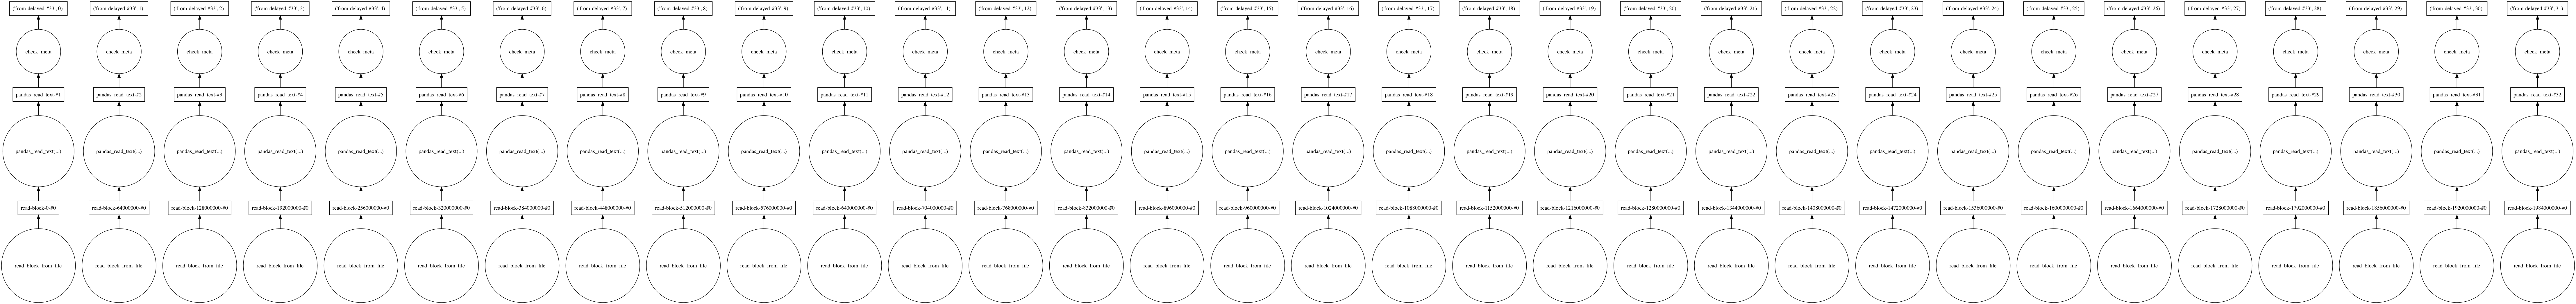

In [35]:
df.visualize()

#### Diagnostics - Progress Bar

In [67]:
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, CacheProfiler, visualize

In [37]:
with ProgressBar():
    df.fare_amount.sum().compute()

[########################################] | 100% Completed | 40.6s


In [46]:
# Register Globally?
pbar = ProgressBar()
pbar.register()
# df.fare_amount.sum().compute()

In [41]:
# Unregister Global Callbacks
# pbar.unregister()

#### Diagnositics - Profiler

In [47]:
prof = Profiler()
prof.register()

In [ ]:
df.compute()

In [52]:
# prof.results
# prof.visualize()
# prof.clear()

#### Diagnostics - ResourceProfiler

In [58]:
rprof = ResourceProfiler(dt=0.5)
rprof.register()

In [60]:
df.fare_amount.sum().compute()

[########################################] | 100% Completed | 50.3s


151785085.33999997

In [62]:
rprof.visualize()

Figure(id='ccd1ffc1-ae29-41c4-b2c5-9b731f0f0582', ...)

#### Diagnositics - CacheProfiler

In [64]:
cprof = CacheProfiler()
cprof.register()

In [65]:
df.fare_amount.sum().compute()

[########################################] | 100% Completed | 50.1s


151785085.33999997

In [66]:
cprof.visualize()

Figure(id='e22d9d43-8c60-418a-8cc6-e16dd4048110', ...)

#### Display all Diagnostics - Stacked

In [68]:
visualize([prof, rprof, cprof])

Column(id='29903322-77b1-4222-8ef5-cd142be00292', ...)

#### Clear Profilers

In [105]:
prof.clear()
rprof.clear()
cprof.clear()

In [75]:
df.fare_amount.describe()

Dask Series Structure:
npartitions=1
    float64
        ...
Name: fare_amount, dtype: float64
Dask Name: describe, 396 tasks

In [112]:
df[df.fare_amount > 0]['fare_amount'].mean().compute()

[########################################] | 100% Completed | 37.1s


13.522109177762822

dask.dataframe.core.DataFrame

In [86]:
# visualize([prof, rprof, cprof])